In [215]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go 
import seaborn as sns
from plotly.offline import iplot

In [48]:
data = pd.read_csv("Ecommerce Customers")

In [49]:
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [50]:
df = data.copy()

In [51]:
df.shape

(500, 8)

In [52]:
# A function to extract city from the address
def ext_stat(s):
    s = s.split('\n')[-1]
    s = s.split(',')[-1].strip()
    s = s.split(' ')[0]
    return s

In [53]:
df["State"] = df.Address.map(ext_stat)

In [54]:
df["State"]

0      MI
1      CA
2      DC
3      OH
4      PR
       ..
495    UT
496    CA
497    TN
498    TX
499    OR
Name: State, Length: 500, dtype: object

In [55]:
df.groupby("State")["State"].agg('count')

State
AK      7
AL      9
APO    16
AR      6
AS      9
       ..
VT     12
WA      4
WI      5
WV      9
WY      7
Name: State, Length: 62, dtype: int64

In [56]:
print("Number of States in the data: %d"%df.State.nunique())

Number of States in the data: 62


In [57]:
df.drop("Address",inplace=True,axis=1)

In [59]:
print("Number of unique Emails: %d "%df.Email.nunique())

Number of unique Emails: 500 


In [60]:
df.columns

Index(['Email', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent',
       'State'],
      dtype='object')

In [61]:
df.index

RangeIndex(start=0, stop=500, step=1)

In [62]:
df.isnull().sum()

Email                   0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
State                   0
dtype: int64

In [63]:
df[df.duplicated()]

,Email,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,State


In [64]:
df.dtypes

Email                    object
Avatar                   object
Avg. Session Length     float64
Time on App             float64
Time on Website         float64
Length of Membership    float64
Yearly Amount Spent     float64
State                    object
dtype: object

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Avatar                500 non-null    object 
 2   Avg. Session Length   500 non-null    float64
 3   Time on App           500 non-null    float64
 4   Time on Website       500 non-null    float64
 5   Length of Membership  500 non-null    float64
 6   Yearly Amount Spent   500 non-null    float64
 7   State                 500 non-null    object 
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [66]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [71]:
print("Number of unique Avatars: %d"%df.Avatar.nunique())

Number of unique Avatars: 138


In [73]:
df.select_dtypes("number").median()

Avg. Session Length      33.082008
Time on App              11.983231
Time on Website          37.069367
Length of Membership      3.533975
Yearly Amount Spent     498.887875
dtype: float64

In [74]:
df

,Email,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,State
0,mstephenson@fernandez.com,Violet,34.497268,12.655651,39.577668,4.082621,587.951054,MI
1,hduke@hotmail.com,DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933,CA
2,pallen@yahoo.com,Bisque,33.000915,11.330278,37.110597,4.104543,487.547505,DC
3,riverarebecca@gmail.com,SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344,OH
4,mstephens@davidson-herman.com,MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092,PR
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,Tan,33.237660,13.566160,36.417985,3.746573,573.847438,UT
496,katrina56@gmail.com,PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004,CA
497,dale88@hotmail.com,Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145,TN
498,cwilson@hotmail.com,Teal,33.322501,12.391423,36.840086,2.336485,456.469510,TX


In [75]:
df.drop("Email",inplace=True,axis=1)

In [84]:
(df.Avatar.value_counts() <= 2).values.astype('i').sum()

40

In [86]:
avatar_stats = df.Avatar.value_counts()

In [88]:
less_than_2 = avatar_stats[avatar_stats<=2]

In [90]:
df["Avatar"] = df.Avatar.apply(lambda x: 'other' if x in less_than_2.index else x)

In [92]:
df.Avatar.value_counts()

Avatar
other             64
CadetBlue          7
Cyan               7
SlateBlue          7
GreenYellow        7
                  ..
LightSteelBlue     3
Gray               3
LightGray          3
Aquamarine         3
Beige              3
Name: count, Length: 99, dtype: int64

In [96]:
df

,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,State
0,Violet,34.497268,12.655651,39.577668,4.082621,587.951054,MI
1,DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933,CA
2,Bisque,33.000915,11.330278,37.110597,4.104543,487.547505,DC
3,SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344,OH
4,MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092,PR
...,...,...,...,...,...,...,...
495,Tan,33.237660,13.566160,36.417985,3.746573,573.847438,UT
496,PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004,CA
497,Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145,TN
498,Teal,33.322501,12.391423,36.840086,2.336485,456.469510,TX


In [97]:
nums = df.select_dtypes("number").columns
cats = [x for x in df.columns if x not in nums]

In [100]:
len(nums)

5

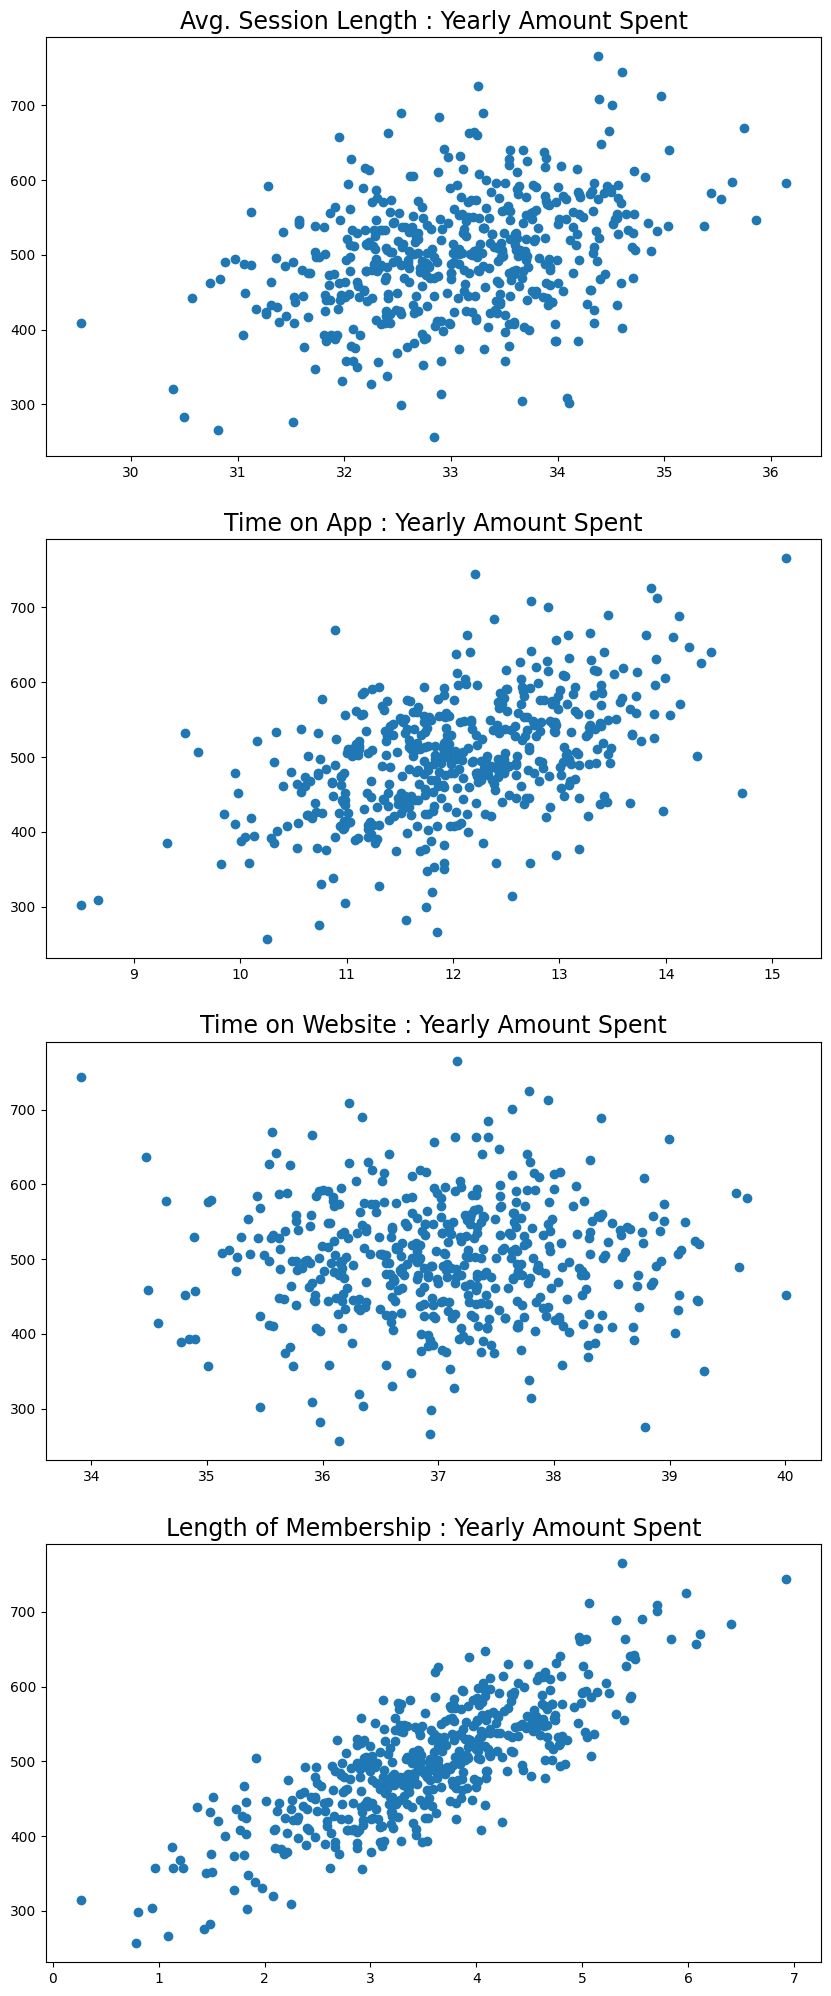

In [105]:
f,ax = plt.subplots(4,1,figsize=(10,25))
for i,c in enumerate(nums[:-1]):
    ax[i].scatter(x=c,y="Yearly Amount Spent",data=df)
    ax[i].set_title(f"{c} : Yearly Amount Spent",fontsize=17)

In [108]:
q1 = np.quantile(df["Yearly Amount Spent"].values,0.25)
q3 = np.quantile(df["Yearly Amount Spent"].values,0.75)
iqr = q3 - q1
lw_fence = q1 - 1.5 * iqr
up_fence = q3 + 1.5 * iqr

In [109]:
def divider(x):
    if x >= lw_fence and x <= up_fence:
        return 'n'
    else:
        return 'o'

In [111]:
df["Outlier"] = df["Yearly Amount Spent"].apply(divider)

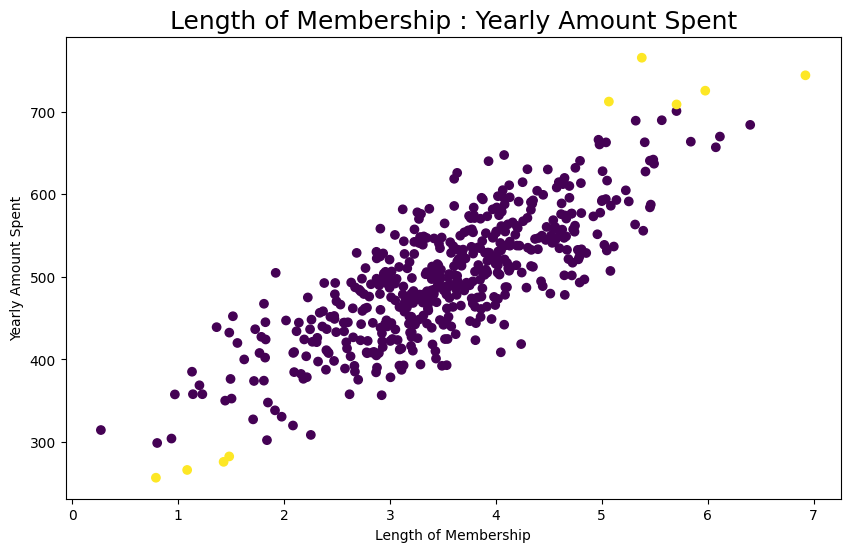

In [120]:
plt.figure(figsize=(10,6))
plt.title(f"{nums[3]} : Yearly Amount Spent",fontsize=18)
plt.xlabel(nums[3])
plt.ylabel("Yearly Amount Spent")
plt.scatter(nums[3],"Yearly Amount Spent",c=[0 if outlier == 'n' else 1 for outlier in df["Outlier"]],data=df)
plt.show()

In [123]:
df[df["Outlier"] == 'o'].min()

Avatar                   Gainsboro
Avg. Session Length      30.492537
Time on App              10.256549
Time on Website          33.913847
Length of Membership       0.78952
Yearly Amount Spent     256.670582
State                          DPO
Outlier                          o
dtype: object

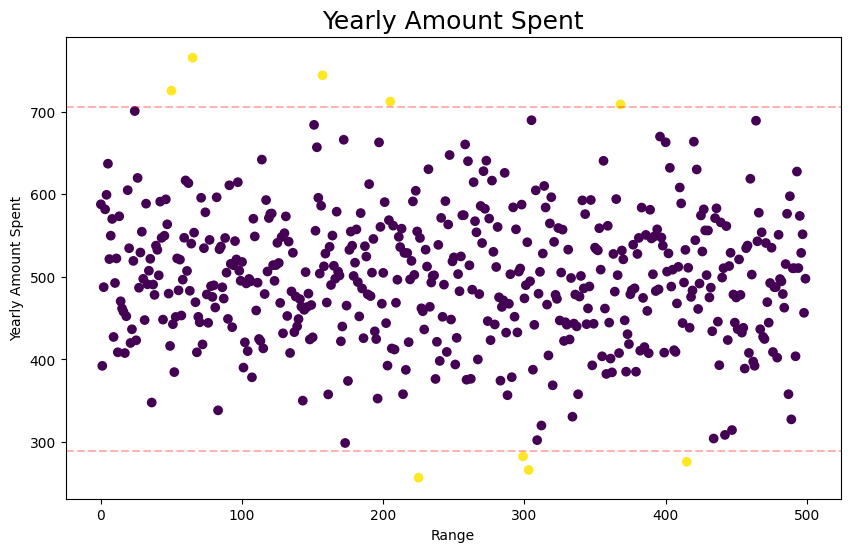

In [124]:
plt.figure(figsize=(10,6))
plt.title(f"Yearly Amount Spent",fontsize=18)
plt.xlabel("Range")
plt.ylabel("Yearly Amount Spent")
plt.scatter(range(500),"Yearly Amount Spent",c=[0 if outlier == 'n' else 1 for outlier in df["Outlier"]],data=df)
plt.axhline(lw_fence,linestyle='--',alpha=0.3,color='r')
plt.axhline(up_fence,linestyle='--',alpha=0.3,color='r')
plt.show()

In [127]:
from warnings import filterwarnings
filterwarnings("ignore")

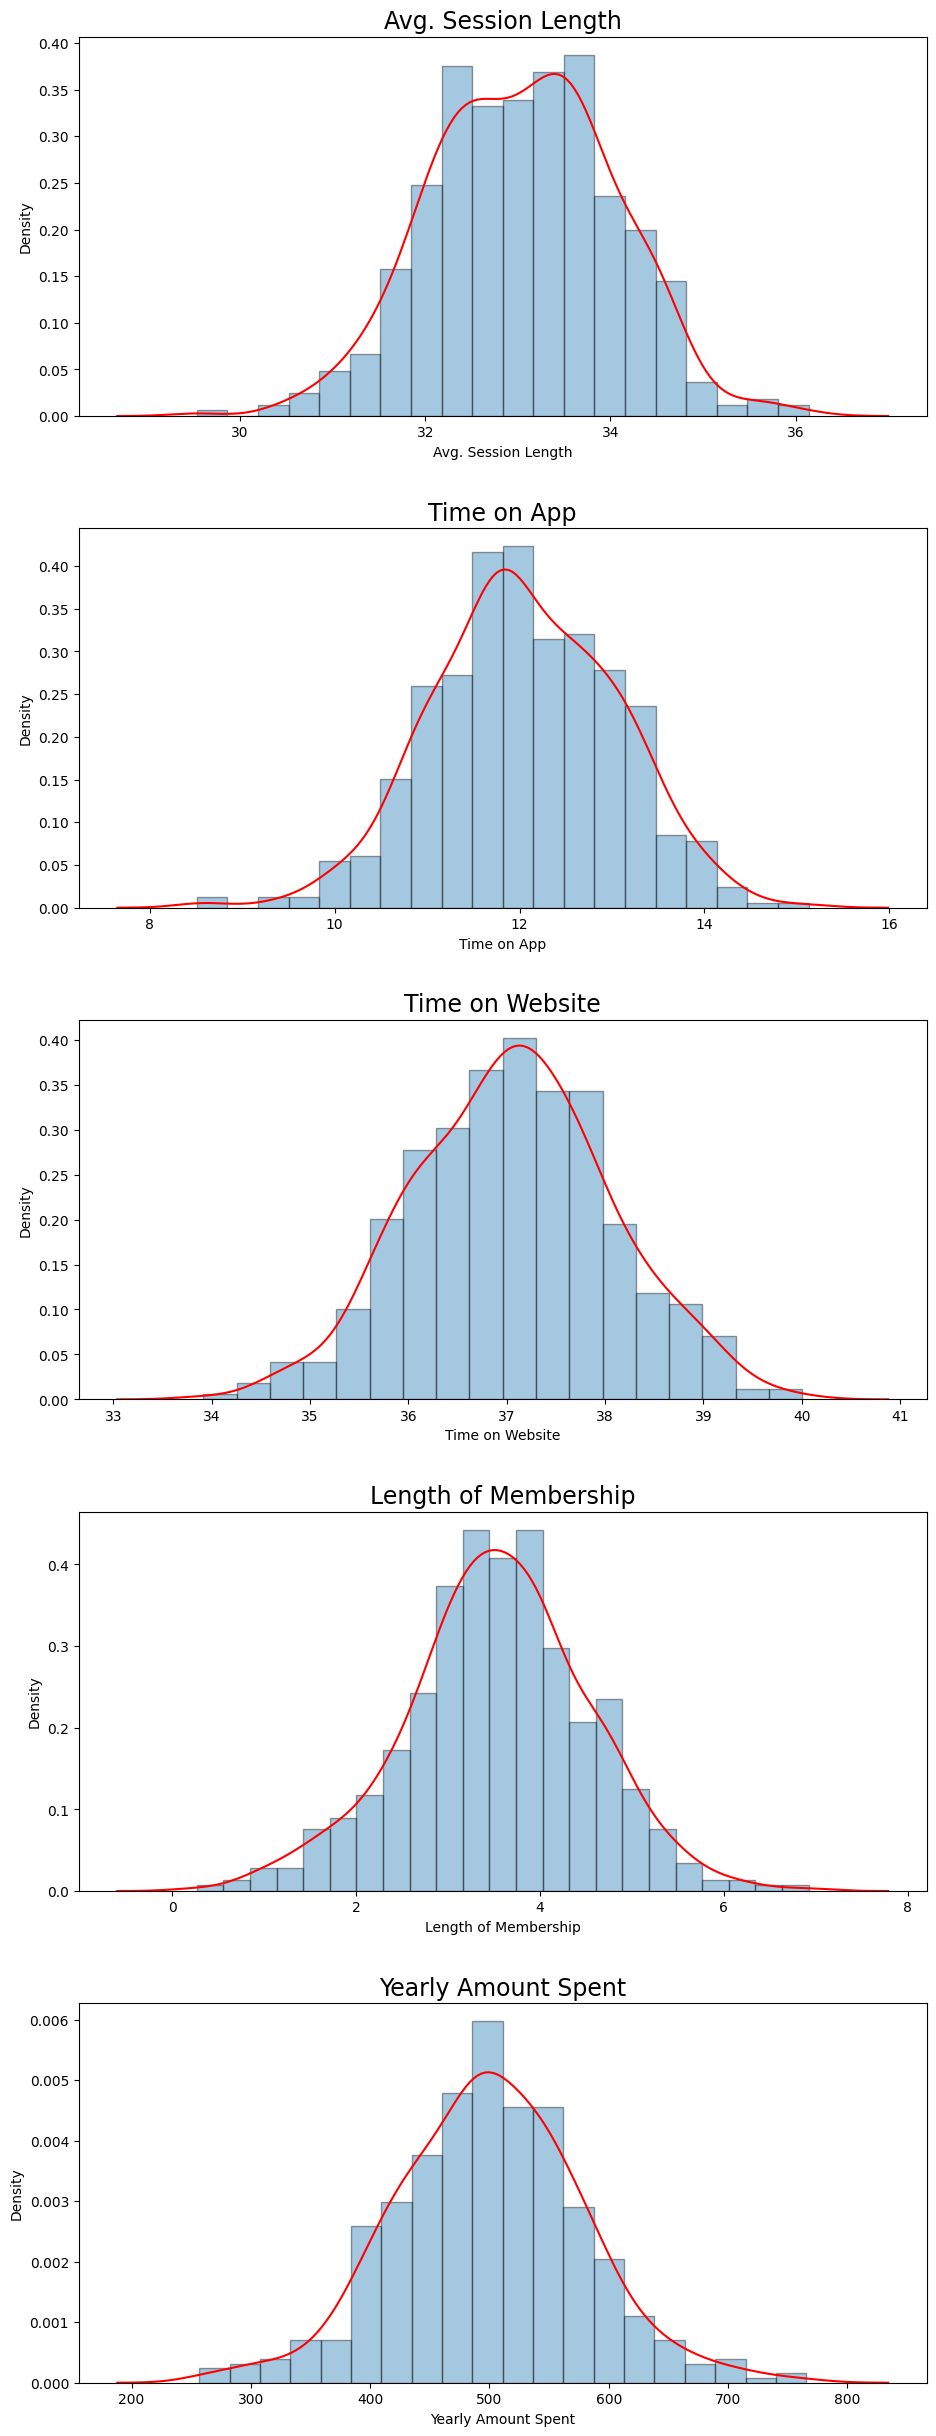

In [133]:
f,ax = plt.subplots(5,1,figsize=(10,25))
for i,c in enumerate(nums):
    sns.distplot(df[c],ax=ax[i],kde_kws={"color":"red"},hist_kws={"edgecolor":"black"})
    ax[i].set_title(f"{c}",fontsize=17)
f.tight_layout(pad=3.0)

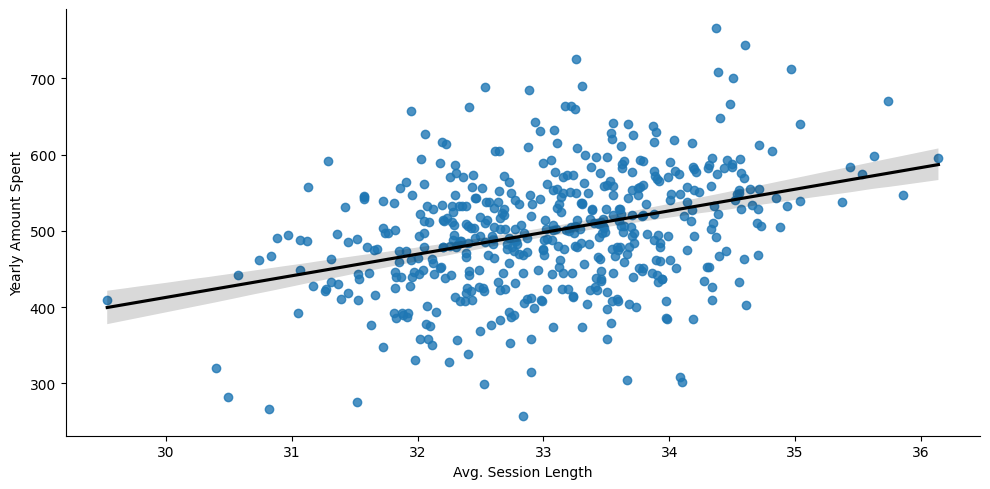

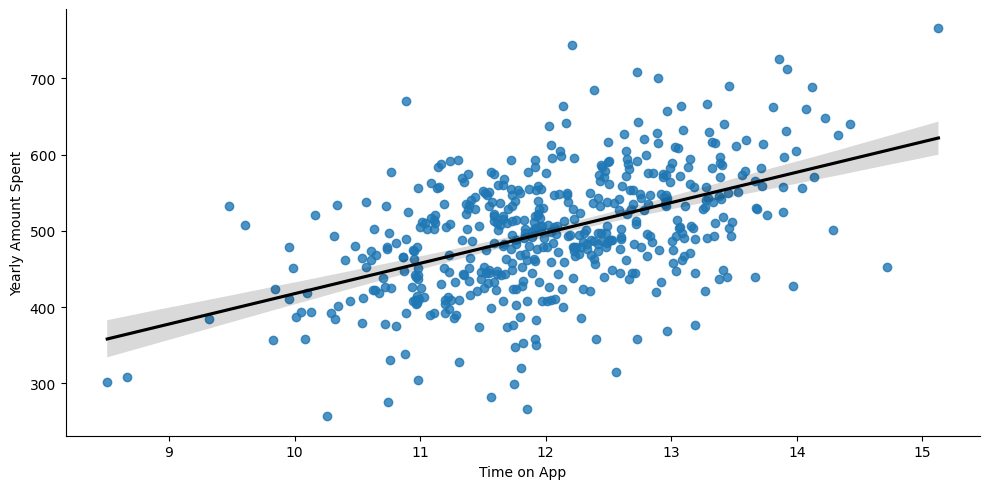

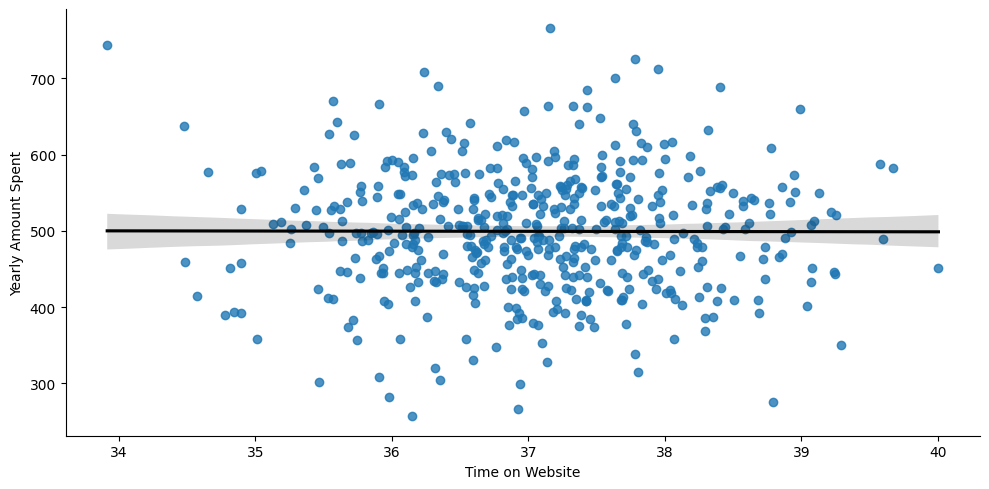

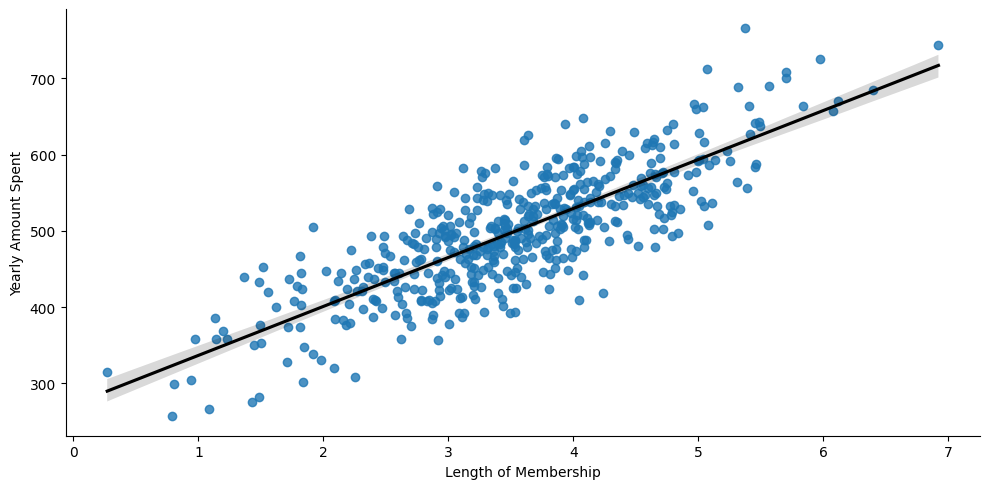

In [142]:
for i,c in enumerate(nums[:-1]):
    sns.lmplot(data=df,x=c,y="Yearly Amount Spent",aspect=2,line_kws={"color":"black"})
    ax[i].set_title(f"{c}",fontsize=17)

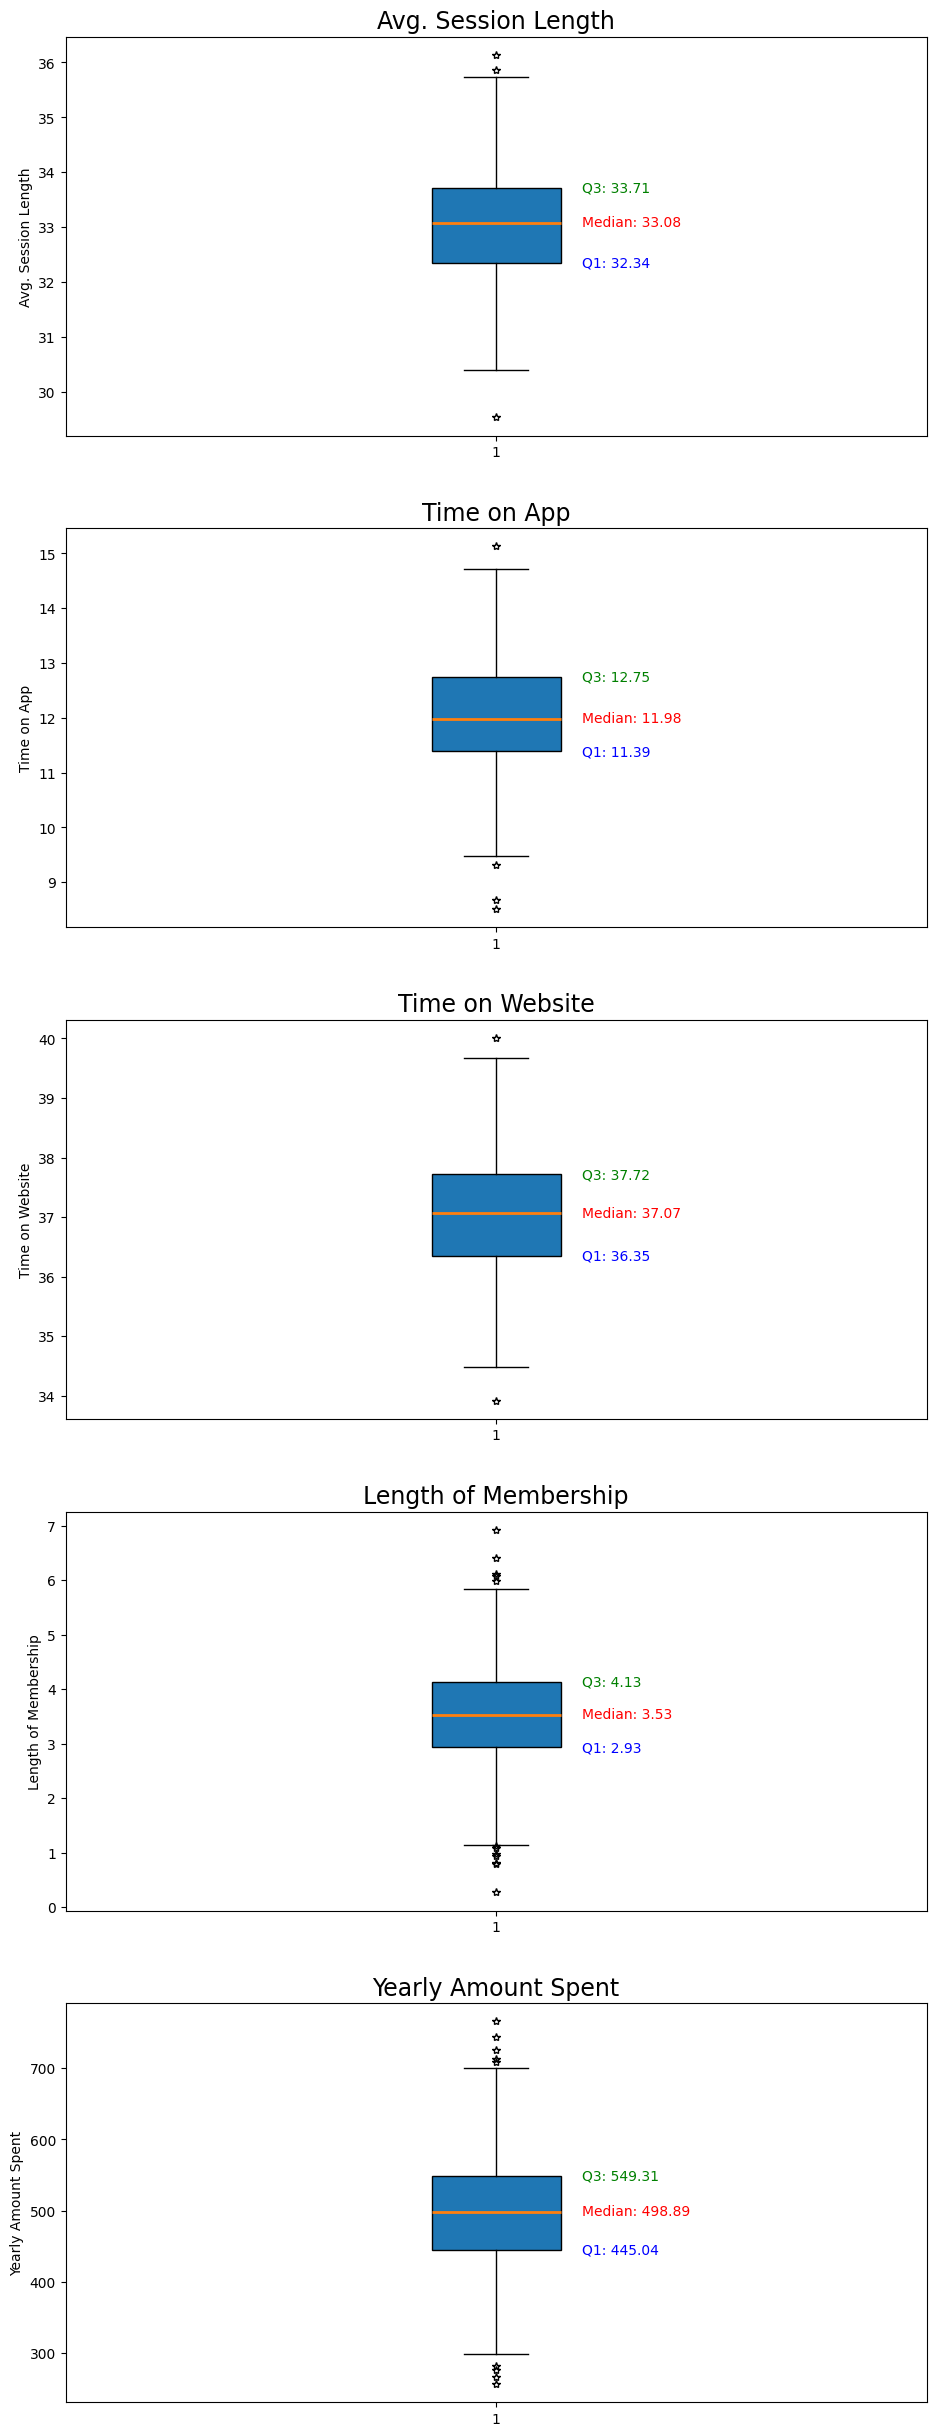

In [152]:
f,ax = plt.subplots(5,1,figsize=(10,25))
for i,c in enumerate(nums):
    box = ax[i].boxplot(df[c],sym='*',medianprops={"linewidth":2},patch_artist=True)
    ax[i].set_title(f"{c}",fontsize=17)
    med = df[c].median()
    q1 = np.quantile(df[c].values,0.25)
    q3 = np.quantile(df[c].values,0.75)
    ax[i].text(1.1, med, f'Median: {med:.2f}', va='center', ha='left', fontsize=10, color='red')
    ax[i].text(1.1, q1, f'Q1: {q1:.2f}', va='center', ha='left', fontsize=10,color='blue')
    ax[i].text(1.1, q3, f'Q3: {q3:.2f}', va='center', ha='left', fontsize=10,color='green')
    ax[i].set_ylabel(f"{c}")
f.tight_layout(pad=3.0)
plt.show()

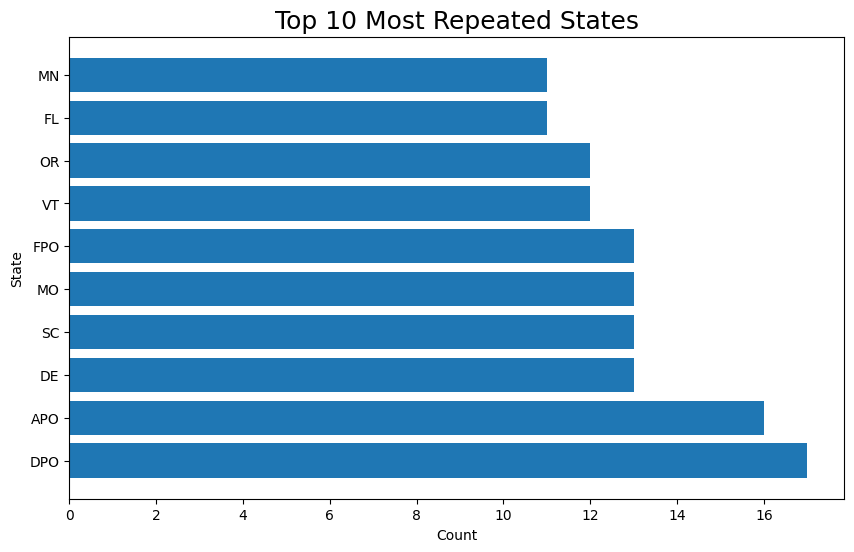

In [167]:
plt.figure(figsize=(10,6))
plt.title("Top 10 Most Repeated States",fontsize=18)
plt.barh(y=df['State'].value_counts().index[:10],width=df["State"].value_counts().values[:10])
plt.ylabel("State")
plt.xlabel("Count")
plt.show()

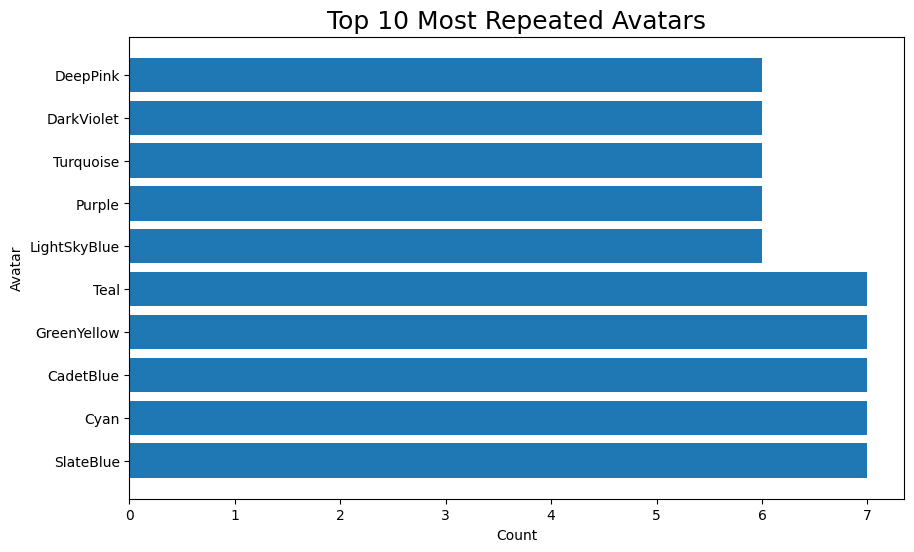

In [173]:
plt.figure(figsize=(10,6))
plt.title("Top 10 Most Repeated Avatars",fontsize=18)
plt.barh(y=data['Avatar'].value_counts().index[:10],width=data["Avatar"].value_counts().values[:10])
plt.ylabel("Avatar")
plt.xlabel("Count")
plt.show()

In [182]:
s = df["State"].value_counts()[:10].index

In [184]:
s

Index(['DPO', 'APO', 'DE', 'SC', 'MO', 'FPO', 'VT', 'OR', 'FL', 'MN'], dtype='object', name='State')

In [188]:
dx = df[df["State"].isin(s)]

<Axes: xlabel='State', ylabel='Yearly Amount Spent'>

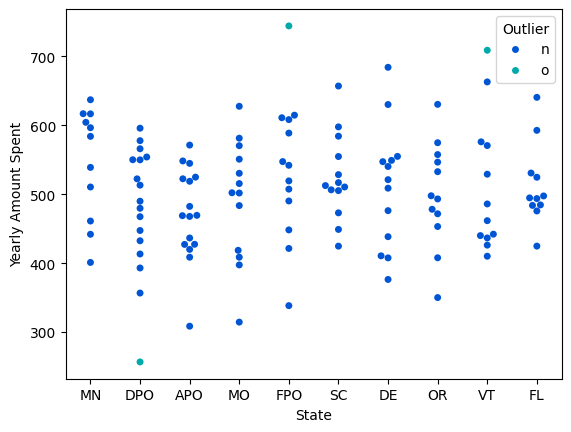

In [190]:
sns.swarmplot(data=dx,x="State",y="Yearly Amount Spent",hue='Outlier',palette='winter')

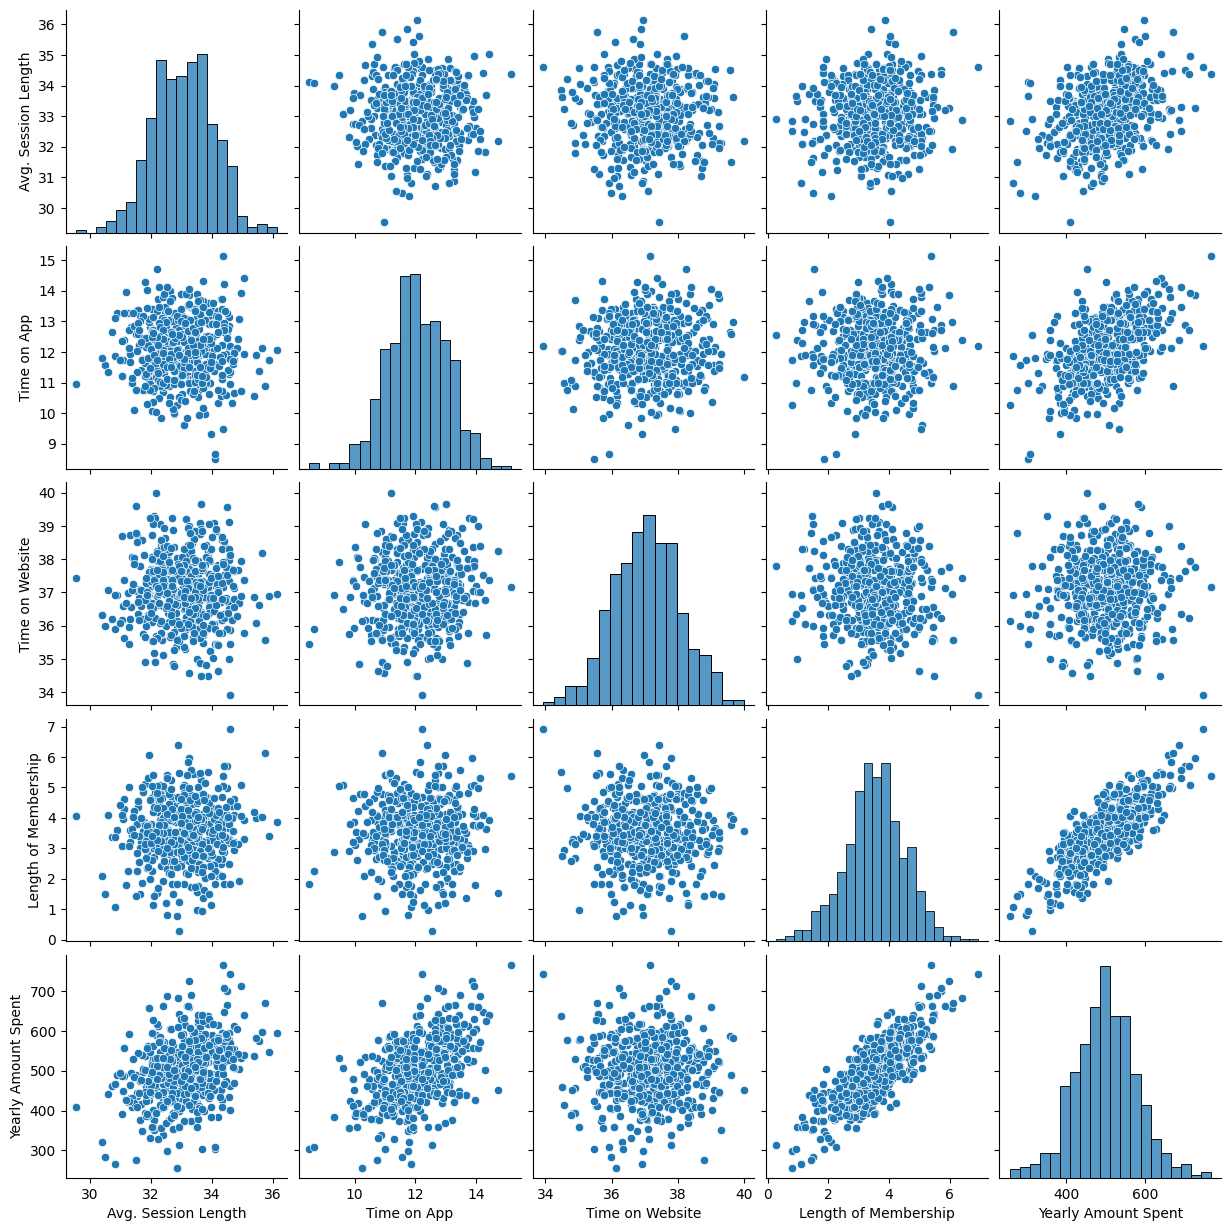

In [191]:
sns.pairplot(df)

In [192]:
df.State.value_counts().shape

(62,)

In [194]:
mu = df.groupby("State")["Yearly Amount Spent"].mean()

In [206]:
for x,y in mu.items():
    df.loc[df.State == x, "State"] = y

In [207]:
df

,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,State,Outlier
0,Violet,34.497268,12.655651,39.577668,4.082621,587.951054,496.810692,n
1,DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933,470.616406,n
2,Bisque,33.000915,11.330278,37.110597,4.104543,487.547505,494.273123,n
3,SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344,537.757418,n
4,MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092,503.804542,n
...,...,...,...,...,...,...,...,...
495,Tan,33.237660,13.566160,36.417985,3.746573,573.847438,566.491138,n
496,PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004,470.616406,n
497,Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145,523.508113,n
498,Teal,33.322501,12.391423,36.840086,2.336485,456.469510,481.115005,n


# Removing Outliers

In [208]:
df[df["Outlier"] == 'o'].shape[0]

9

In [210]:
df = df[df["Outlier"] == 'n']

In [211]:
df.drop(["Outlier","Avatar"],axis=1,inplace=True)

In [213]:
corr = df.corr()

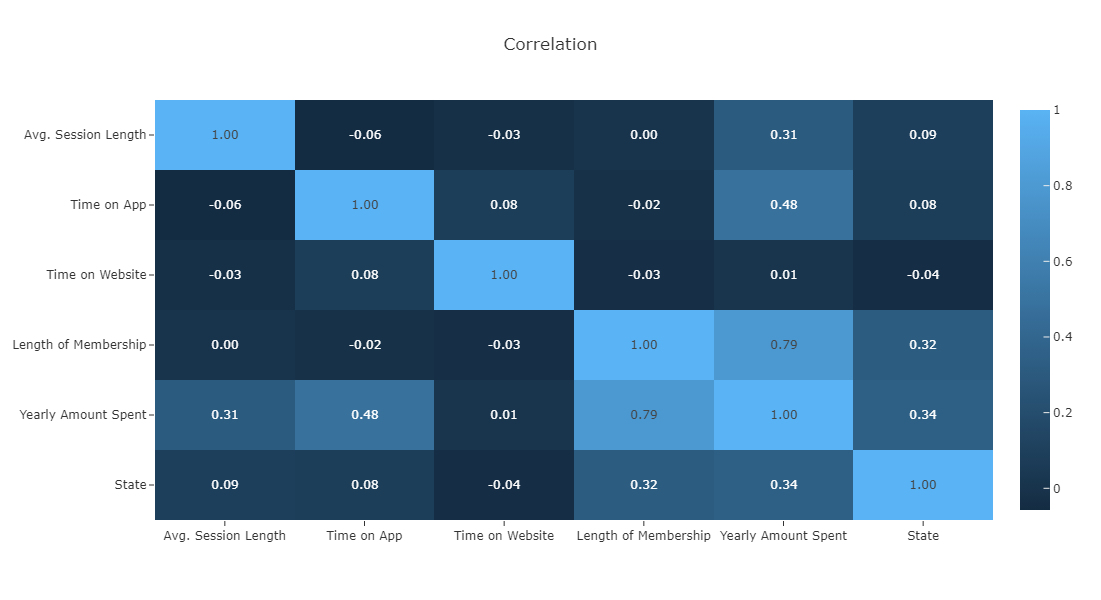

In [222]:
f = px.imshow(corr,text_auto='0.2f',title="Correlation",aspect='auto',template='ggplot2')
f.update_layout(width=1000, height=600)
f.show()

In [223]:
from sklearn.model_selection import train_test_split

In [228]:
x = df.drop(["Yearly Amount Spent","State"],axis=1)
y = df["Yearly Amount Spent"]

In [229]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [230]:
from sklearn.linear_model import LinearRegression,Ridge

In [231]:
lr = LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

0.9841581530533869

In [232]:
from sklearn.model_selection import ShuffleSplit,cross_val_score
cv = ShuffleSplit(test_size=0.2,n_splits=5)
cross_val_score(LinearRegression(),x,y,cv=cv)

array([0.98156577, 0.97527457, 0.98467346, 0.97983806, 0.97759594])

In [247]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

def fit_model_using_gridsearch(x,y):
    algs = {
        'linear_regression':{
            'model': LinearRegression(),
            'params': {
                'positive':[True,False]
            }
        },
        'Ridge':{
            'model':Ridge(),
            'params': {
                'alpha': [1,2],
                'solver': ['svd', 'cholesky', 'lsqr','sag']
            }
        },
        'decision_tree':{
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ["mse","friedman_mse"],
                'splitter': ['random','best']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5,test_size=0.2)
    for alg,c in algs.items():
        gs = GridSearchCV(c['model'],c['params'],cv=cv,return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model':alg,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [248]:
fit_model_using_gridsearch(x,y)

,model,best_score,best_params
0,linear_regression,0.980381,{'positive': True}
1,Ridge,0.983793,"{'alpha': 1, 'solver': 'sag'}"
2,decision_tree,0.890576,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [255]:
final_model = Ridge(alpha=1.0,solver='sag',positive=False)

In [253]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_feat = sc.fit_transform(x_train)

In [256]:
final_model.fit(x_train_feat,y_train)

Ridge(solver='sag')

In [261]:
final_model.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'positive': False,
 'random_state': None,
 'solver': 'sag',
 'tol': 0.0001}

In [265]:
x_test_feat = sc.transform(x_test)

In [266]:
y_pred = final_model.predict(x_test_feat)

In [275]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,coverage_error,r2_score
print("Mean Absolute Error: %f"%mean_absolute_error(y_test,y_pred))
print("Mean Squared Error: %f"%mean_squared_error(y_test,y_pred))
print("Mean Absolute Percentage Error: %f"%mean_absolute_percentage_error(y_test,y_pred))
print("R2 Score: %f"%r2_score(y_test,y_pred))

Mean Absolute Error: 8.613596
Mean Squared Error: 110.034934
Mean Absolute Percentage Error: 0.017910
R2 Score: 0.984249


In [277]:
import pickle 
with open("rg.pickle",'wb') as f:
    pickle.dump(final_model,f)

In [278]:
y_test.shape[0]

99

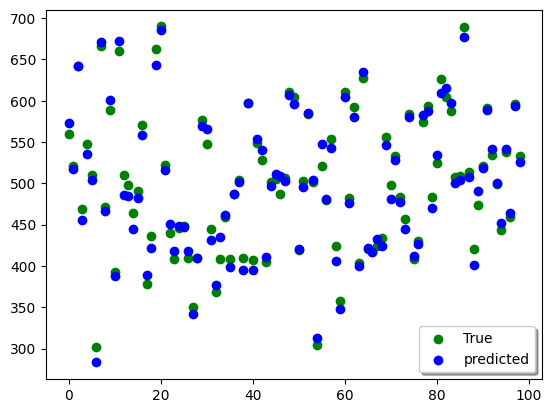

In [282]:
plt.scatter(range(y_test.shape[0]),y_test,color='green',label='True')
plt.scatter(range(y_test.shape[0]),y_pred,color='blue',label='predicted')
plt.legend(shadow=True)
plt.show()

In [284]:
x_train.columns

Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership'],
      dtype='object')

In [285]:
with open('scaler.pickle','wb') as f:
    pickle.dump(sc,f)